https://www.tensorflow.org/tutorials/keras/basic_classification

https://github.com/Zackory/Keras-MNIST-GAN/blob/master/mnist_gan.py


In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(tr_im,tr_lab),(tt_im,tt_lab) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
tr_im.shape

(60000, 28, 28)

In [6]:
tr_lab

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

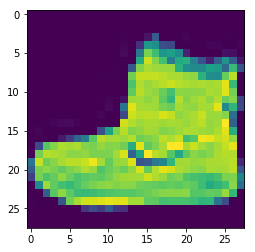

In [7]:
plt.imshow(tr_im[0,:,:])

In [8]:
npar = 100 #number of standard normal deviates to feed to generator input

In [9]:
tr_im.max()

255

In [10]:
tr_im = tr_im / tr_im.max()
tr_im = tr_im.reshape(tr_im.shape[0],784)

In [11]:
tt_im = tt_im / tt_im.max()
tt_im = tt_im.reshape(tt_im.shape[0],784)

In [12]:
#opt = tf.train.AdamOptimizer(learning_rate=0.0005,beta1=0.5)
opt = keras.optimizers.Adam(lr=0.0005,beta_1=0.5)

In [13]:
generator = keras.Sequential()
generator.add(keras.layers.Dense(256, input_dim=npar, kernel_initializer=keras.initializers.RandomNormal(stddev=0.02)))
generator.add(keras.layers.LeakyReLU(0.2))
generator.add(keras.layers.Dense(512))
generator.add(keras.layers.LeakyReLU(0.2))
generator.add(keras.layers.Dense(1024))
generator.add(keras.layers.LeakyReLU(0.2))
generator.add(keras.layers.Dense(784, activation="sigmoid"))
generator.compile(loss='binary_crossentropy', optimizer=opt)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               803600    
Total para

In [14]:
discriminator = keras.Sequential()
discriminator.add(keras.layers.Dense(1024, input_dim=784, kernel_initializer=keras.initializers.RandomNormal(stddev=0.02)))
discriminator.add(keras.layers.LeakyReLU(0.2))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Dense(512))
discriminator.add(keras.layers.LeakyReLU(0.2))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Dense(256))
discriminator.add(keras.layers.LeakyReLU(0.2))
discriminator.add(keras.layers.Dropout(0.3))
discriminator.add(keras.layers.Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
__________

In [15]:
discriminator.trainable = False
gi = keras.layers.Input(shape=(npar,))
x = generator(gi)
go = discriminator(x)
gan = keras.Model(inputs=gi,outputs=go)
gan.compile(loss="binary_crossentropy",optimizer=opt)

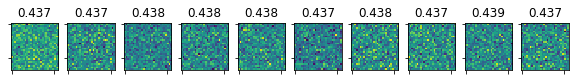

In [16]:

def plot_gen():
    fig, axes = plt.subplots(nrows=1,ncols=10,figsize = (10,10))
    plot_noise = np.random.randn(10,npar) 
    vecs = generator.predict(plot_noise)#.reshape(10,28,28)
    isreal = discriminator.predict(vecs)
    #print(isreal.shape)
    for ax,vec,real in zip(axes.flatten(),vecs.reshape(10,28,28),isreal.flatten()):
        ax.imshow(vec)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title("{0:1.3G}".format(real))
plot_gen()
#generator.save("test.h5")
o_d = "gen_models"
if os.path.exists(o_d):
    shutil.rmtree(o_d)

234


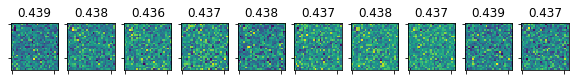

5 0.5509274 1.0741332


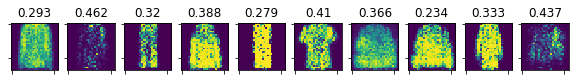

10 0.5640835 1.1211897


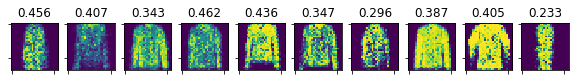

15 0.60236454 1.0546844


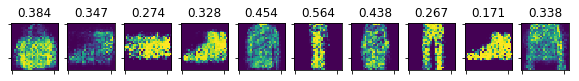

20 0.6143789 1.0561011


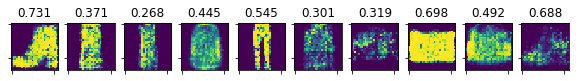

25 0.6415299 0.89625704


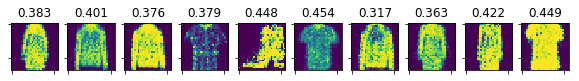

30 0.6216687 0.9631955


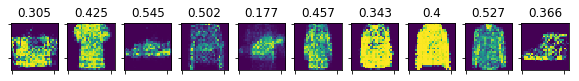

35 0.672648 0.8438329


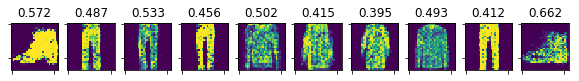

40 0.656689 0.8300668


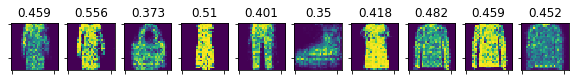

45 0.6609491 0.8716955


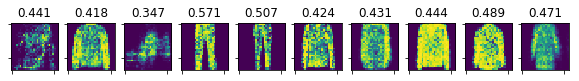

50 0.63895416 0.8329867


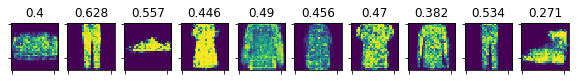

55 0.6459105 0.87058365


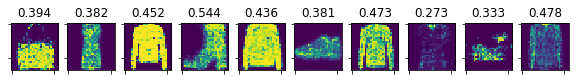

60 0.6484269 0.89421004


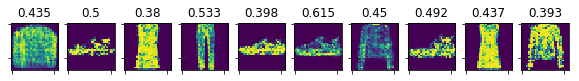

65 0.66843843 0.9332421


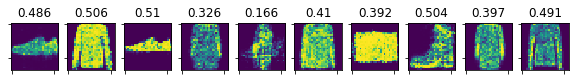

70 0.6611098 0.8177623


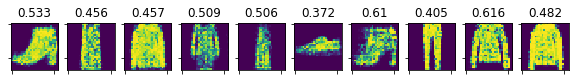

75 0.64440835 0.80622137


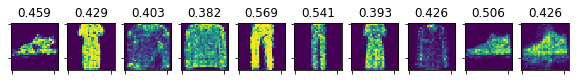

80 0.6641515 0.8092023


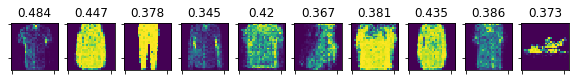

85 0.67651594 0.8742126


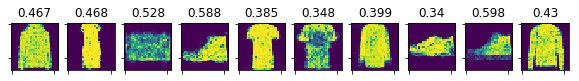

90 0.65996945 0.79565364


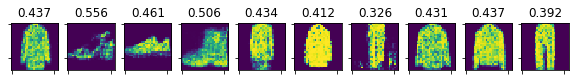

95 0.6602911 0.8258871


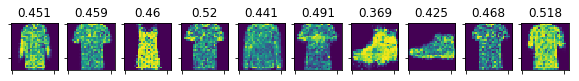

100 0.66616505 0.8075162


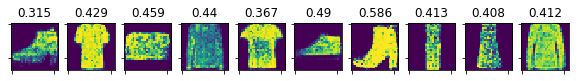

105 0.6684653 0.7884782


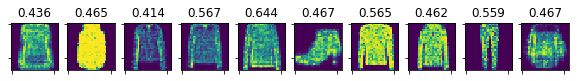

110 0.6750225 0.7986763


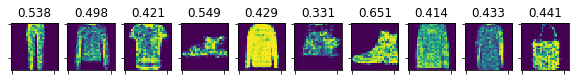

115 0.64928555 0.8558223


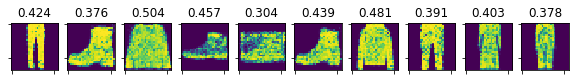

120 0.66658694 0.825312


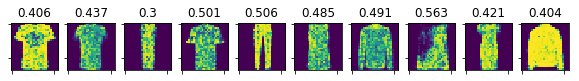

125 0.66412747 0.91169155


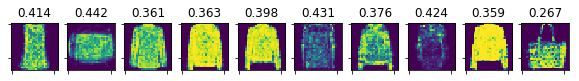

130 0.6352978 0.85583115


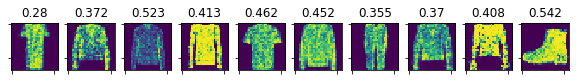

135 0.65111595 0.8110444


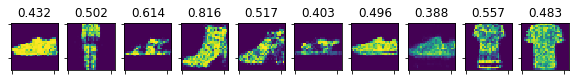

140 0.6589766 0.84851265


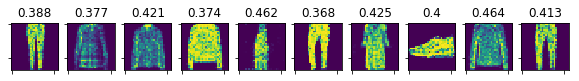

145 0.64027303 0.8666317


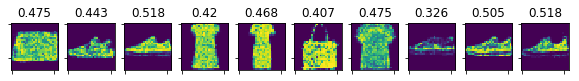

150 0.6521587 0.8142996


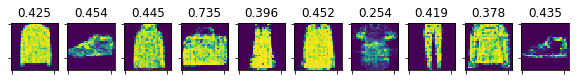

155 0.6579026 0.91081685


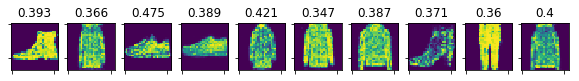

160 0.65141475 0.85155267


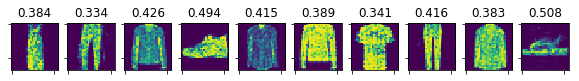

165 0.6699721 0.85349476


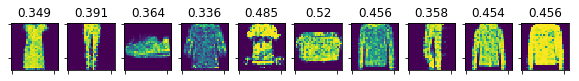

170 0.66410697 0.90972227


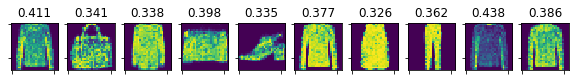

175 0.65949786 0.98382753


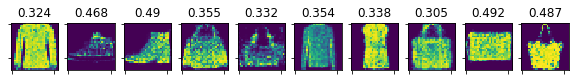

180 0.6464766 0.86052644


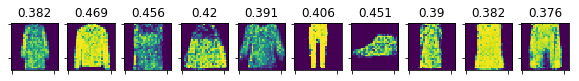

185 0.67691994 1.0877454


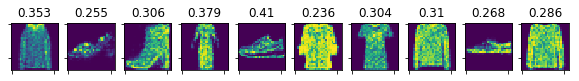

190 0.6314827 0.87129056


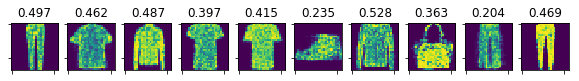

195 0.650607 0.8712433


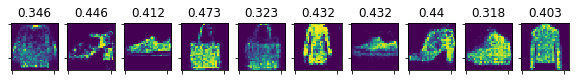

200 0.63162637 0.9525003


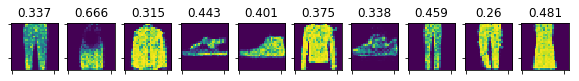

205 0.6447997 0.87164843


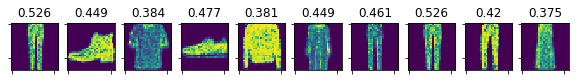

210 0.6658335 0.8596257


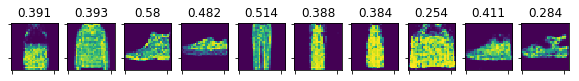

215 0.6494048 0.86495745


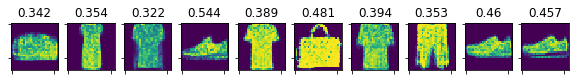

220 0.66211176 0.90786684


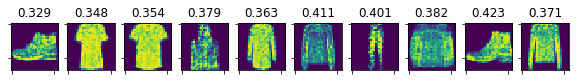

225 0.64432347 0.8276295


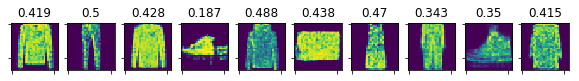

230 0.64201534 0.90296686


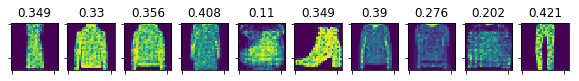

235 0.6426592 0.85988677


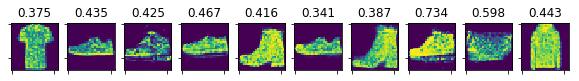

240 0.63562727 0.9509089


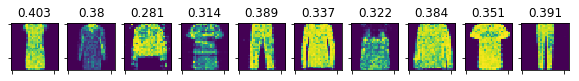

245 0.6459103 0.86914504


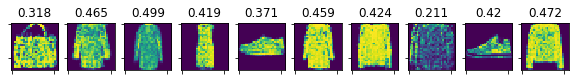

250 0.6472403 0.8694229


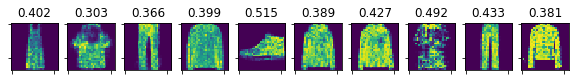

255 0.6587639 0.8607413


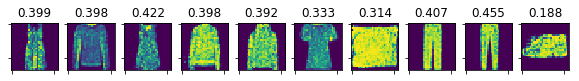

260 0.6146699 0.9408176


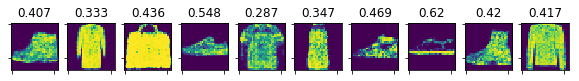

265 0.6320281 0.82368505


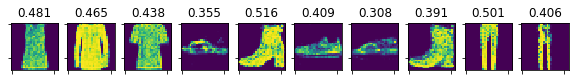

270 0.65088475 0.83631


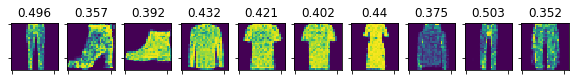

275 0.6300601 0.8301846


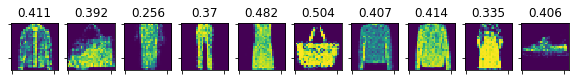

280 0.6500274 0.82476205


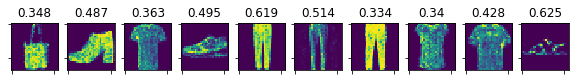

285 0.6342164 0.9340173


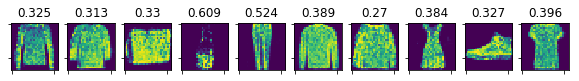

290 0.64300644 0.92307794


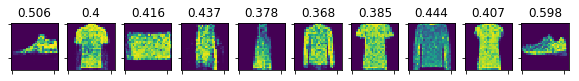

295 0.6358658 0.8682049


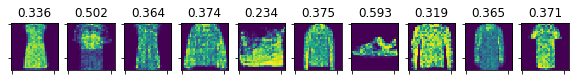

300 0.6548668 0.8711788


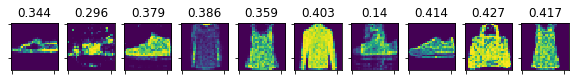

305 0.6313975 0.8918216


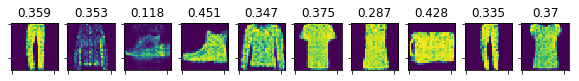

310 0.62416416 0.9037539


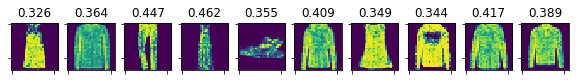

315 0.6464411 0.8242905


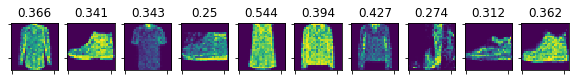

320 0.66224074 0.89389354


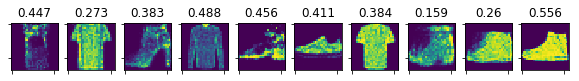

325 0.64715517 0.8508953


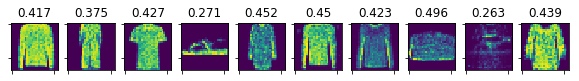

330 0.6462751 0.9044106


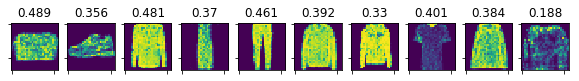

335 0.65016866 0.9740145


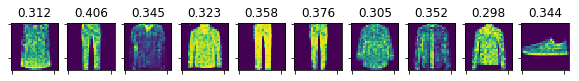

340 0.6293938 0.90904945


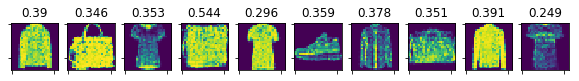

345 0.65108705 0.89827114


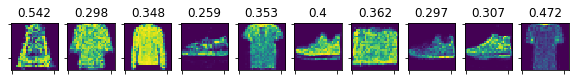

350 0.630067 0.8774487


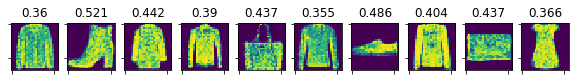

355 0.61902803 0.9386708


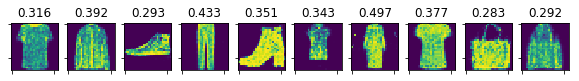

360 0.6380054 0.8242614


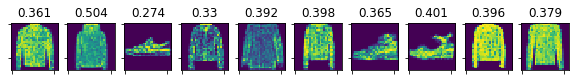

365 0.6613562 0.8931437


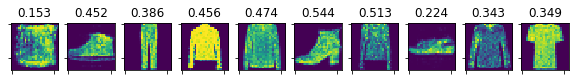

370 0.62354815 0.96961033


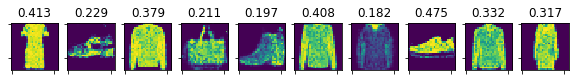

375 0.6422306 0.9498331


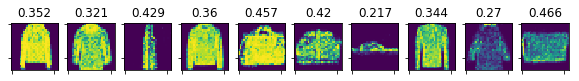

380 0.64379305 0.84982324


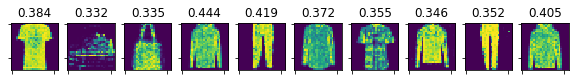

385 0.6265011 0.86011136


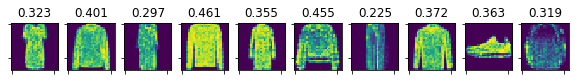

390 0.6264455 0.84788764


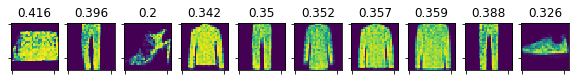

395 0.6227263 0.92682797


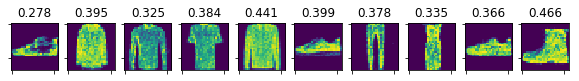

In [17]:
batch_size = 256
batch_count = int(tr_im.shape[0] / batch_size)
print(batch_count)
plot_gen()
plt.show()
for e in range(1,400):
    for _ in range(batch_count):
        noise = np.random.randn(batch_size,npar)
        tr_im_batch = tr_im[np.random.randint(0,tr_im.shape[0],size=batch_size)]
        gen_im = generator.predict(noise)
        #print(gen_im.shape,tr_im_batch.shape)
        tr_im_batch = np.concatenate([tr_im_batch,gen_im])
        #noisy labels...
        tr_im_lab = np.zeros(tr_im_batch.shape[0])
        tr_im_lab[:batch_size] = np.random.uniform(0.9,1.0,size=batch_size)
        tr_im_lab[batch_size:] = np.random.uniform(0.0,0.1,size=batch_size)
        discriminator.trainable = True
        dloss = discriminator.train_on_batch(tr_im_batch,tr_im_lab)
        noise = np.random.randn(batch_size,npar)
        tr_img_lab = np.ones(batch_size)
        discriminator.trainable = False
        gloss = gan.train_on_batch(noise,tr_img_lab)
    
    if e % 5 == 0:
        print(e,dloss,gloss)
        plot_gen()
        plt.show()
        generator.save(os.path.join(o_d,"gen_{0}.h5").format(e))
        
    